<a href="https://colab.research.google.com/github/mikehviz/IranProtestTweets/blob/main/Iran_Protest_Tweets_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages("rgl")
#install.packages("tidytext")
#install.packages("wordcloud")
#install.packages("reshape2")
library(dplyr) 
library(tidytext)
library(wordcloud)
library(reshape2)
library(stringr)
library(ggplot2)
library( rgl )
library(showtext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

iran_tweets <- read.csv("https://docs.google.com/spreadsheets/d/13PlFrutQ-EWYRNRVtqk6wsZYzfYOlNx9E5k7SD7-xHE/export?format=csv")
head(iran_tweets)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Talking Diplomacy,"Islamabad, Pakistan",Web based talk show hosted by former Ambassadors of Pakistan,2018-06-26 15:12:03+00:00,162,105,12,FALSE,2022-11-13 18:14:21+00:00,Ambassador Asif Durrani's @AsifDurrani20 op-ed for BOL News. #Iran's brewing crisis #IranProtests2022 https://t.co/wqdh2jsgRM,"['Iran', 'IranProtests2022']",Twitter for Android
2,Mirza Mueen,Pakistan,I help News Agencies to beef up the influx of online readers. 🚀 #news #digital #marketing,2021-08-02 15:37:32+00:00,165,873,554,FALSE,2022-11-13 18:11:45+00:00,"Iranian security forces have killed at least 326 people in a crackdown on nationwide protests since #MahsaaAmini's death in custody, Iran Human Rights said in an updated toll on Saturday. #IranProtests2022 #IranianWomen https://t.co/kvPTnqC8Uz",['MahsaaAmini'],Twitter for Android
3,Hannah Rules 🇨🇦👑🦋 حَنا‌خانوم آرِنت,"Ontario, CA","We’re destined to be free, and we will be. زن زندگی آزادی 🕊💪🏼💕",2022-09-26 00:28:17+00:00,14,146,2265,FALSE,2022-11-13 18:11:37+00:00,@ksadjadpour True face of the Islamic regime. #Mahsa_Amini #IranRevoIution2022 #IranProtests2022 #iran,"['Mahsa_Amini', 'IranRevoIution2022', 'IranProtests2022', 'iran']",Twitter for iPhone
4,soobaan,Kingdom of Iran 👑,,2014-03-27 22:42:03+00:00,126,119,5568,FALSE,2022-11-13 18:05:11+00:00,Powerful protests for #iran today. @RishiSunak &amp; the #ukgovernment need to act now to stop the execution of 1000s of innocent people simply protesting for a democratic #Iran #trafalgarsquare #IranProtests2022 #IranRevolution2022 https://t.co/YMkHTkJ1lG,"['iran', 'ukgovernment']",Twitter for Android
5,د. نور الشمري#العراق,United States,عراقيه الأصل امريكيه الجنسيه علم النفس ناشطه في حقوق الإنسان والمراه ضد ملالي إيران وذيولها في العراق woman life freedom المرأه الحياه الحريه,2022-08-12 18:44:40+00:00,1618,537,2386,FALSE,2022-11-13 18:03:22+00:00,"Top artwork: girl with Baloon, 2002 London, by the graffiti artist #Banksy Bottom Artwork: No Girl, No Balloon…No More, 2022, by Iranian artist Siavash Moghimi. #MahsaAmini #مهسا_امینی #IranRevoIution #IranProtests2022 #mahsaamini https://t.co/Rk37gYk56T",['Banksy'],Twitter for Android
6,Sveva,,"Sociologist of culture @unimib. Interested in #gbv Gender based violence, intimacy, transition to adulthood. #podcast https://t.co/TQaEKa8M12",2013-12-03 10:30:31+00:00,178,520,6780,FALSE,2022-11-13 17:59:35+00:00,@NatalieAmiri That is so so Terrible. Brave women. #IranProtests2022,['IranProtests2022'],Twitter for iPhone


In [ ]:
#filtering out frequent words that show little information, saving words that stay as stock_words
stock_words <-         
  iran_tweets %>%
  unnest_tokens(word, text)%>%  
  mutate(word=tolower(word)) %>%
  anti_join(stop_words, by="word") %>% 
  select(word)

stock_words

word
<chr>
ambassador
asif
durrani's
asifdurrani20
op
ed
bol
news
iran's


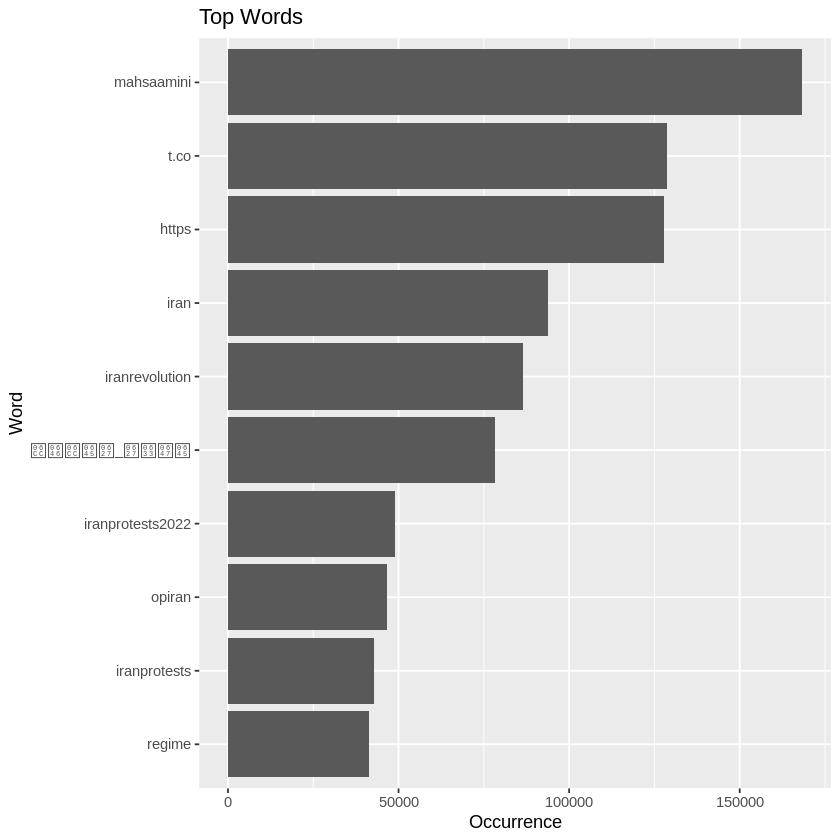

In [ ]:

stock_words %>%
  count(word) %>%
   mutate(word = reorder(word, n))  %>%
  slice_max(word, n=10)   %>%
  ggplot() +
    geom_col(aes(x = word, y = n)) +
  labs(x = "Word", y= "Occurrence", title = "Top Words") +
  coord_flip()

In [ ]:
#make our own vector of words to exclude-- we can add more if more pop up.
my_exclude_vector <- c("aap","https", "t.co", "http")
my_exclude_vector


my_exclude_df <- data.frame(word=my_exclude_vector, stringsAsFactors = FALSE)
my_exclude_df

#Anti-join my_exclude_df
no_excludewords_iran <-stock_words %>%
   anti_join(my_exclude_df, by="word")


head(no_excludewords_iran)

[1] "aap"   "https" "t.co"  "http"

word
<chr>
aap
https
t.co
http


,word
,<chr>
1,ambassador
2,asif
3,durrani's
4,asifdurrani20
5,op
6,ed


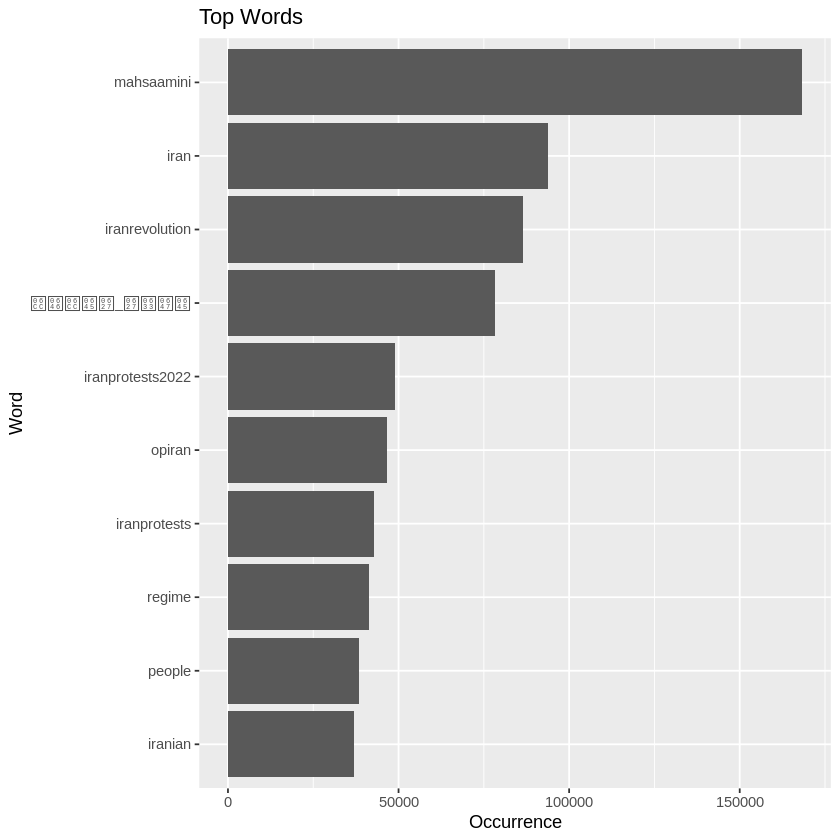

In [ ]:
no_excludewords_iran %>%
  count(word) %>%
   mutate(word = reorder(word, n))  %>%
  slice_max(word, n=10)   %>%
  ggplot() +
    geom_col(aes(x = word, y = n)) +
  labs(x = "Word", y= "Occurrence", title = "Top Words") +
  coord_flip()

In [ ]:
system("gdown --id 1I44Xvie1IbJ6G_o2-hdKPYj0lzsYFCpD")  
bing<-as_tibble(read.csv("bing.csv"))

dim(bing)
head(bing)


[1] 6789    3

X,word,sentiment
<int>,<chr>,<chr>
1,2-faced,negative
2,2-faces,negative
3,abnormal,negative
4,abolish,negative
5,abominable,negative
6,abominably,negative


In [ ]:
system("gdown --id 1OAklvJ-CtrrPfwX4H-JyA9VvH7x7jC3U")  
nrc<-as_tibble(read.csv("nrc.csv"))

dim(nrc)
head(nrc)

[1] 13872     3

X,word,sentiment
<int>,<chr>,<chr>
1,abacus,trust
2,abandon,fear
3,abandon,negative
4,abandon,sadness
5,abandoned,anger
6,abandoned,fear


In [ ]:
system("gdown --id 1pKBUx_HscqpRPJgAfDR2_2eCUflpYg3v")  
afinn<-as_tibble(read.csv("afinn.csv"))

dim(afinn)
head(afinn)

[1] 2477    3

X,word,value
<int>,<chr>,<int>
1,abandon,-2
2,abandoned,-2
3,abandons,-2
4,abducted,-2
5,abduction,-2
6,abductions,-2


In [ ]:
afinn_iran_words <- no_excludewords_iran %>%
  inner_join(afinn, by="word")
  head(afinn_iran_words)

,word,X,value
,<chr>,<int>,<int>
1,crisis,526,-3
2,killed,1399,-3
3,protests,1799,-2
4,death,568,-2
5,true,2280,2
6,powerful,1745,2


In [ ]:
afinn_iran_words %>%
  select(value)%>%
  summary()

     value       
 Min.   :-5.000  
 1st Qu.:-2.000  
 Median :-2.000  
 Mean   :-0.725  
 3rd Qu.: 2.000  
 Max.   : 5.000  

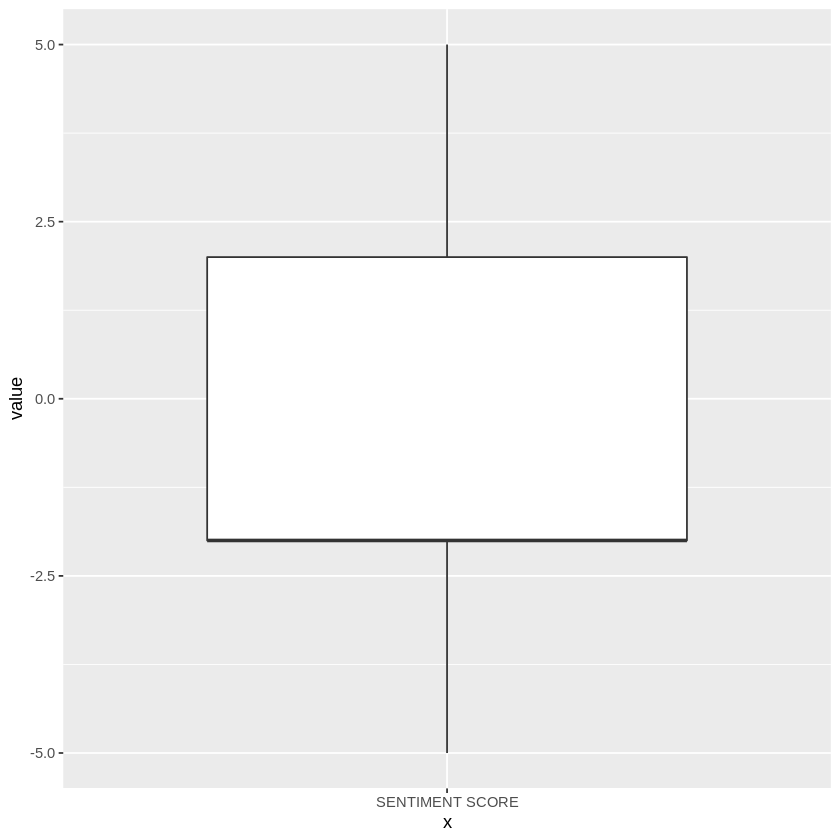

In [ ]:
afinn_iran_words %>% 
  ggplot() +
  geom_boxplot(aes(x="SENTIMENT SCORE", y=value))


In [ ]:

bing_iran_words <- no_excludewords_iran %>%
  inner_join(get_sentiments("bing"), by="word")

head(bing_iran_words)

,word,sentiment
,<chr>,<chr>
1,crisis,negative
2,killed,negative
3,protests,negative
4,death,negative
5,toll,negative
6,powerful,positive


In [ ]:
bing_iran_words %>%
  count(sentiment, sort=TRUE)

sentiment,n
<chr>,<int>
negative,233888
positive,125997


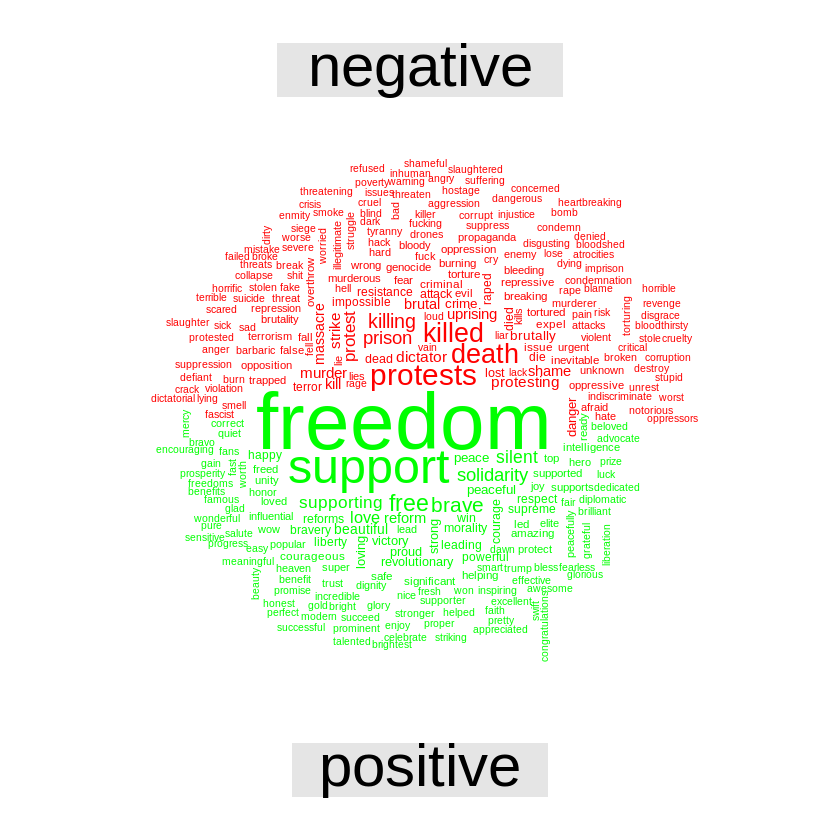

In [ ]:
bing_iran_words %>%
  count(word, sentiment, sort=TRUE) %>%
  acast(word ~ sentiment, value.var = 'n', fill=0) %>%
  comparison.cloud(colors= c("red", "green"), max.words=300)


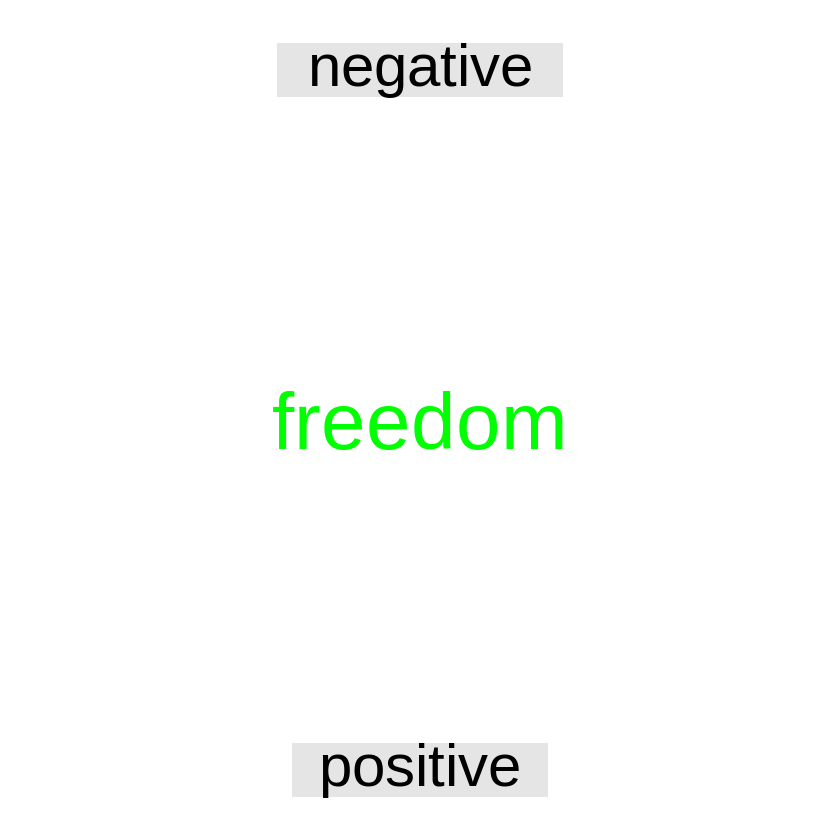

In [ ]:

bing_iran_words %>%
  count(word, sentiment, sort=TRUE) %>%
  acast(word ~ sentiment, value.var = 'n', fill=0) %>%
  comparison.cloud(colors= c("red", "green"), max.words=1)


Joining, by = "word"


sentiment,n
<chr>,<int>
anger,160392
anticipation,114912
disgust,76367
fear,203457
joy,90575
negative,261959
positive,223371
sadness,134951
surprise,70389


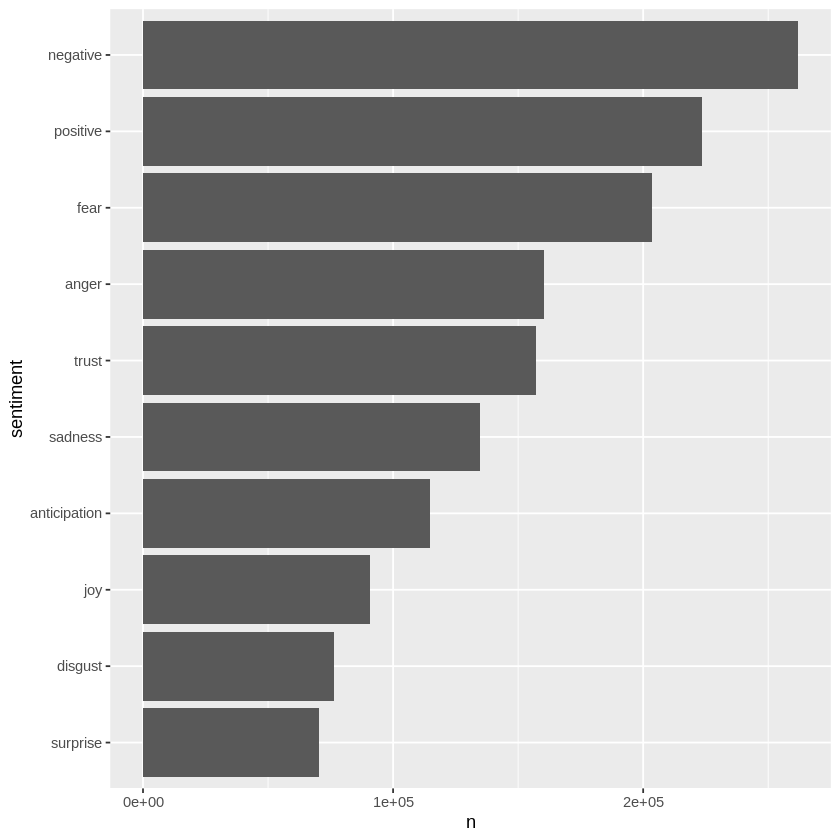

In [ ]:
nrc_iran_words <- no_excludewords_iran %>%
  inner_join(nrc)
  
  nrc_iran_words %>%
  count(sentiment)

nrc_iran_words %>%
  count(sentiment) %>%
  mutate(sentiment=reorder(sentiment,n))  %>% 
ggplot() +
    geom_col(mapping=aes(x=sentiment, y=n))  +
    coord_flip()
